# ANLP LAB 1

---
### Learning Objectives

Our focus in this session is to get to know a few libraries which are currently widely used in deep learning applications, namely TensorFlow and Keras. As an exercise, we will try to implement a model using the linear regression method in Tensorflow.

---



## Tensorflow

TensorFlow is an open source software library for numerical computation using data flow graphs. The graph nodes represent mathematical operations, while the graph edges represent the multidimensional data arrays (tensors) that flow between them. This flexible architecture enables you to deploy computation to one or more CPUs or GPUs in a desktop, server, or mobile device without rewriting code. TensorFlow also includes TensorBoard, a data visualization toolkit.

This section is based on the [Google Tensorflow tutorials](https://www.tensorflow.org/tutorials). 

Simple addition example to introduce you to the tensorflow session.

In [1]:
%tensorflow_version 2.x
import tensorflow as tf #Importing Tensorflow library as tf

**Creating Tensors**


 After importing the TensorFlow library,  we  can  use  the   tf.constant operator  as  follows.

In [2]:
x1 = tf.constant([1, 2, 3, 4])
x2 = tf.constant([5, 6, 7, 8])

**Creating operators**

Now that we have a few starting tensors ready to be used, we can apply more interesting operators  such  as  addition  or  multiplication.

In [3]:
result = x1 + x2
print(result)

result = tf.add(x1, x2)
print(result)

tf.Tensor([ 6  8 10 12], shape=(4,), dtype=int32)
tf.Tensor([ 6  8 10 12], shape=(4,), dtype=int32)



Some  specific  examples of commonly used operators include : 
* tf.add(x, y) Add two tensors of the same type, x + y 
* tf.subtract(x, y)  Subtract tensors of the same type, x - y  
* tf.multiply(x, y)  Multiply two tensors element -wise 

The official documentation carefully lays out all available math ops:  https://www.tensorflow.org/api_docs/cc/group/math-ops



#### Question

1.  Calculate $[1, 2, 3] + [3, 4, 5]$ using Tensorflow
2.  Calculate $[4, 5, 6] - [2, 1, 4]$ using Tensorflow
3.  Calculate $[2, 2, 2] \times [3, 4, 5]$ using Tensorflow


In [8]:
print(tf.add(tf.constant([1,2,3]),tf.constant([3,4,5])))
print(tf.subtract(tf.constant([1,2,3]),tf.constant([3,4,5])))
print(tf.multiply(tf.constant([1,2,3]),tf.constant([3,4,5])))

tf.Tensor([4 6 8], shape=(3,), dtype=int32)
tf.Tensor([-2 -2 -2], shape=(3,), dtype=int32)
tf.Tensor([ 3  8 15], shape=(3,), dtype=int32)


**Executing operators 
with sessions**

To  execute  an  operation  and   retrieve  its  calculated  value,  TensorFlow  requires  a  session.   Only a registered session may fill the values of a Tensor object. To do so, you must create a  session class using tf.Session() and  tell it to run an operator. The result will be a  value you can later use for further computations. 


In [9]:
 # Launch the graph in a session.
 with tf.compat.v1.Session() as ses:

     # Build a graph.
     a = tf.constant(5.0)
     b = tf.constant(6.0)
     c = a * b

     # Evaluate the tensor `c`.
     print(ses.run(c))

30.0


By default colab runs on CPU. If you have GPU locally, try the same code in GPU to see the difference in time. 

## Keras

[Keras](https://keras.io/) is a high-level neural networks API, written in Python. 

Important features:

- Keras is a front-end
- It can use several back-ends: Tensorflow (Google), Theano (Montreal), and CNTK (Microsoft)
- The back-end does the fast tensor multiplication etc.

Use Keras if you need a deep learning library that:

- Allows for easy and fast prototyping (through user friendliness, modularity, and extensibility).
- Supports both convolutional networks and recurrent networks, as well as combinations of the two.
- Runs seamlessly on CPU and GPU.

Read the documentation at [Keras.io](https://keras.io/).

### Getting started

The core data structure of Keras is a `model`, a way to organize layers. The simplest type of model is the `Sequential` model, a linear stack of layers. For more complex architectures, you should use the Keras functional API, which allows to build arbitrary graphs of layers.

Here is the `Sequential` model:


In [10]:
import keras
from keras.models import Sequential

model = Sequential()

Stacking layers is as easy as `.add()`:

In [11]:
from keras.layers import Dense

model.add(Dense(units=64, activation='relu', input_dim=100))
model.add(Dense(units=10, activation='softmax'))

Once your model looks good, configure its learning process with `.compile()`:

In [12]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

If you need to, you can further configure your optimizer. A core principle of Keras is to make things reasonably **simple**, while allowing the user to be fully in control when they need to (the ultimate control being the easy extensibility of the source code).

In [13]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.SGD(lr=0.01, momentum=0.9, nesterov=True))


---

## Exercise
### Linear Regresssion in Tensorflow

---

[Linear regression](http://www.stat.yale.edu/Courses/1997-98/101/linreg.htm) attempts to model the relationship between two variables by fitting a linear equation to observed data. One variable is considered to be an explanatory variable, and the other is considered to be a dependent variable. For example, a modeler might want to relate the weights of individuals to their heights using a linear regression model. 

This section covers

*   Fitting a line to data points
*   Fitting arbitary curves to data points
*  Testing performance of these regression algrorithms
*  Applying regression to real-world data


In [14]:
import numpy as np  # imports NumPy to generate initial raw data
import matplotlib.pyplot  as  plt  # imports mtplotlib to visualize the data

 

*   Create input(x_train) values between -1 and 1 evenly spaced 101 valuse using np.linespace command.
* Create `y_train` so that is generated by $y=2x+ 0.33 \times random$
* Hint: use np.random.randn for generating random_ value


In [15]:
# Your code goes here
x_train  = np.linspace(-1,1,101) 
y_train  = 2*x_train + 0.33*np.random.randn(101)
# The output values are proportional to the input but with added noise

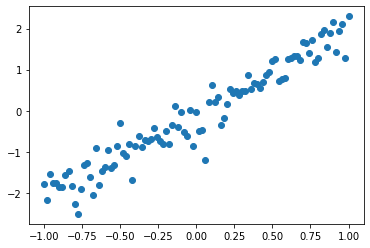

In [16]:
plt.scatter(x_train, y_train)  
plt.show()

  **Hyperparameters**

---
"In machine learning, a hyperparameter is a parameter whose value is set before the learning process begins. By contrast, the values of other parameters are derived via training." ([source](https://en.wikipedia.org/wiki/Hyperparameter_(machine_learning)))

In [17]:
learning_rate  = 0.01  
training_epochs  = 100

**Placeholders**

---

Set up the input and output nodes as placeholders since the value will be injected by `x_train` and `y_train`.

See more about placeholders at https://www.tensorflow.org/api_docs/python/tf/placeholder.

In [19]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

X  =  tf.placeholder(tf.float32)  
Y  =  tf.placeholder(tf.float32) 

Instructions for updating:
non-resource variables are not supported in the long term


 
Define the model as `y = w*x`

In [20]:
def  model(X, w):  
  return  tf.multiply(X, w)   

Set up the weight variable

In [21]:
w  =  tf.Variable( 0.0 , name= "weights" )

**Cost Function**

$cost = \sqrt(\sum((y-y_{model})^2)$ 

Implement this function in tensorflow.


In [22]:
y_model = model(X, w)
# your code goes here
diff = tf.subtract(Y,y_model)
square = tf.multiply(diff,diff)
sumo = tf.math.reduce_sum(square)
cost = tf.math.sqrt(sumo)

And now, optimize your model using gradient descent optimizer.

In [23]:
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

 Set up a session and initialize all variables

In [24]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

In [25]:
for epoch in range(training_epochs): # Loop through the dataset multiple times
  for (x,y) in zip(x_train, y_train): # Loop through each item in the datase
    sess.run(train_op, feed_dict={X:x,Y:y}) #Update the model parameter(s) to try to minimize the cost function

Obtain the final parameter value

In [26]:
w_val = sess.run(w)

In [27]:
sess.close() # close the sesion

Plot the original data and best fit line.

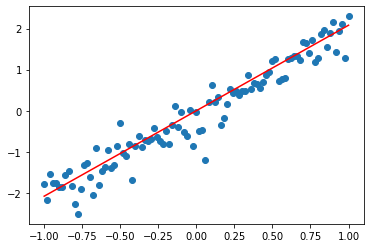

In [28]:
plt.scatter(x_train, y_train)  
y_learned = x_train * w_val  
plt.plot(x_train, y_learned, 'r')  
plt.show()

**Question**

---

Change the `y_train` so that it is generated by the polynomial $y =x^2 + 2x + 0.33 \times random$ and fit with the linear model again. What is the change in the value of `cost`?


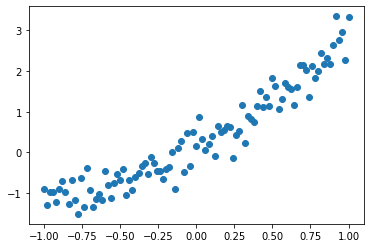

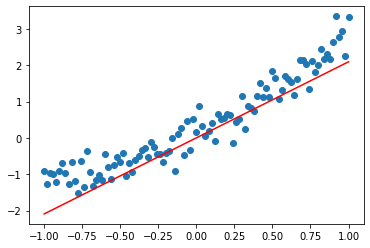

In [29]:
# Your code goes here
x_train  = np.linspace(-1,1,101) 
y_train  = x_train*x_train + 2*x_train +  0.33*np.random.randn(101)
# The output values are proportional to the input but with added noise
plt.scatter(x_train, y_train)  
plt.show()


learning_rate  = 0.01  
training_epochs  = 100

# https://stackoverflow.com/questions/37383812/tensorflow-module-object-has-no-attribute-placeholder
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

X  =  tf.placeholder(tf.float32)  
Y  =  tf.placeholder(tf.float32) 

def model(X, w):  
  return  tf.multiply(X, w)   

w  =  tf.Variable( 0.0 , name= "weights" )

y_model = model(X, w)
# your code goes here
diff = tf.subtract(Y,y_model)
square = tf.multiply(diff,diff)
sumo = tf.math.reduce_sum(square)
cost = tf.math.sqrt(sumo)

train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)


for epoch in range(training_epochs): # Loop through the dataset multiple times
  for (x,y) in zip(x_train, y_train): # Loop through each item in the datase
    sess.run(train_op, feed_dict={X:x,Y:y}) #Update the model parameter(s) to try to minimize the cost function
    
w_val = sess.run(w)


sess.close() # close the sesion


plt.scatter(x_train, y_train)  
y_learned = x_train * w_val  
plt.plot(x_train, y_learned, 'r')  
plt.show()